In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('all_data.csv')
print(df)

     Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]


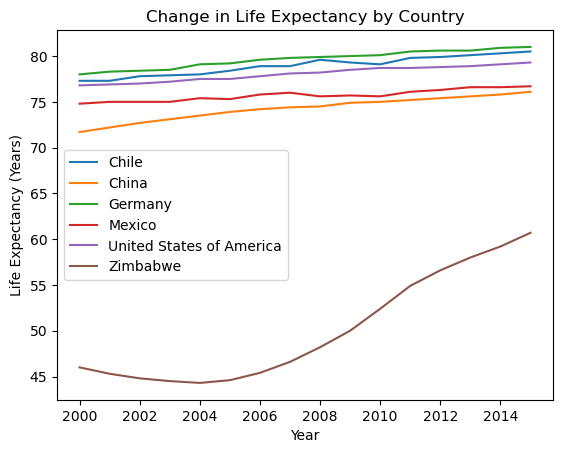

In [42]:
# Group the data by country and calculate the average life expectancy by year
grouped_df = df.groupby(['Country', 'Year']).mean()
data = grouped_df.loc[(country, ), :]

# Create a list of the six countries we want to plot
countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']


for country in countries:
    data = grouped_df.loc[country].reset_index()

    plt.plot(data['Year'], data['Life expectancy at birth (years)'], label=country)
    plt.title('Change in Life Expectancy by Country')
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy (Years)')
    plt.legend()
    
plt.show()

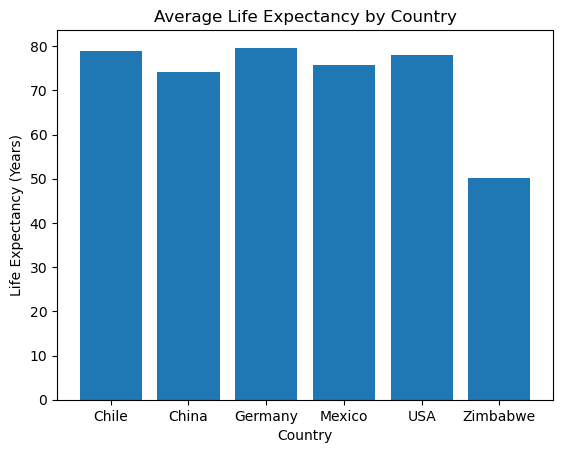

In [44]:
# Define a dictionary of country name abbreviations
country_abbr = {'United States of America': 'USA'}

# Replace full country names with abbreviations in the countries list
countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']
countries_abbr = [country_abbr.get(country, country) for country in countries]

# Calculate the average life expectancy for each country
avg_life_expectancy = []
for country in countries:
    data = grouped_df.loc[country]
    avg = round(data['Life expectancy at birth (years)'].mean(), 2)
    avg_life_expectancy.append(avg)

# Create a bar chart of average life expectancy by country
plt.bar(countries_abbr, avg_life_expectancy)
plt.title('Average Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (Years)')
plt.show()


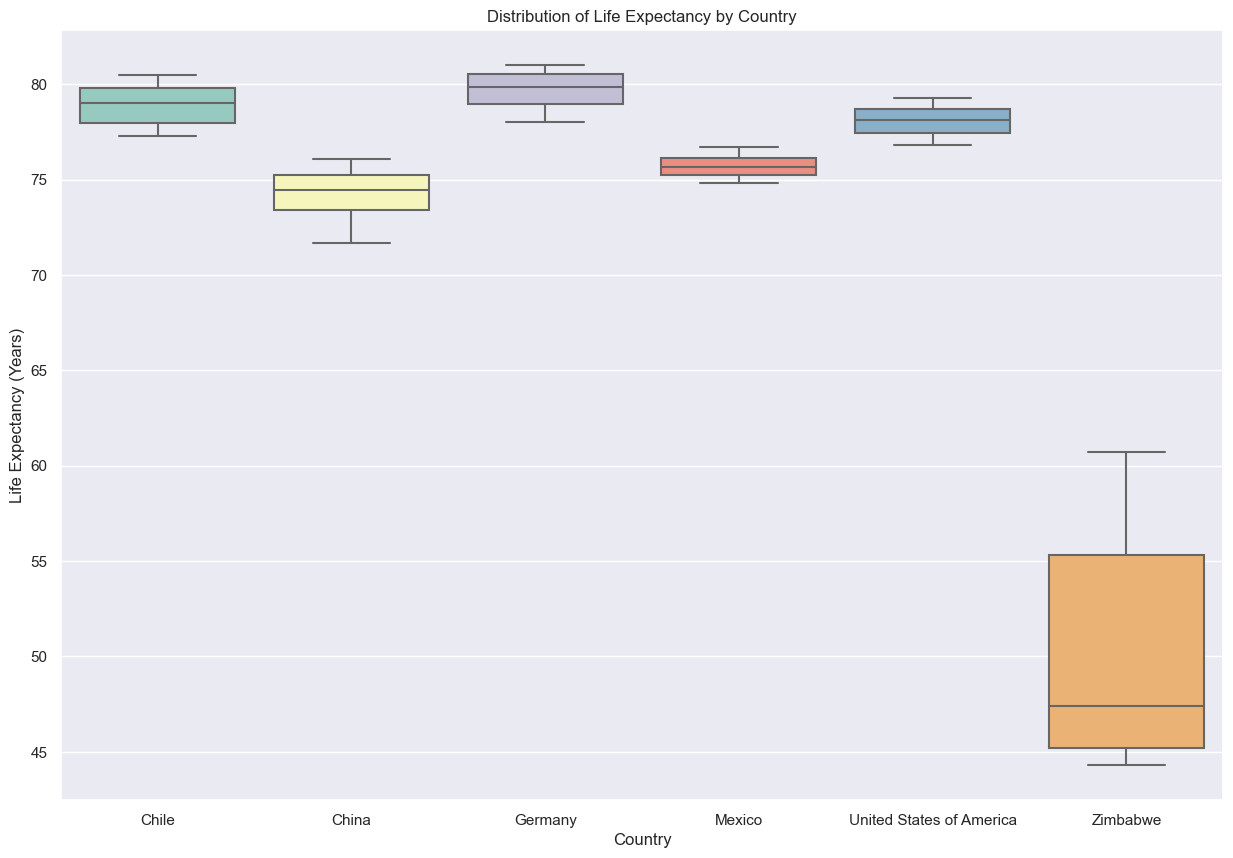

In [60]:
# Replace full country names with abbreviations in the countries list
countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']

# Create a box plot
sns.boxplot(x='Country', y='Life expectancy at birth (years)', data=df, palette='Set3')
sns.set(rc={'figure.figsize':(15,10)})

# Set the title and labels
plt.title('Distribution of Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (Years)')

# Show the plot
plt.show()

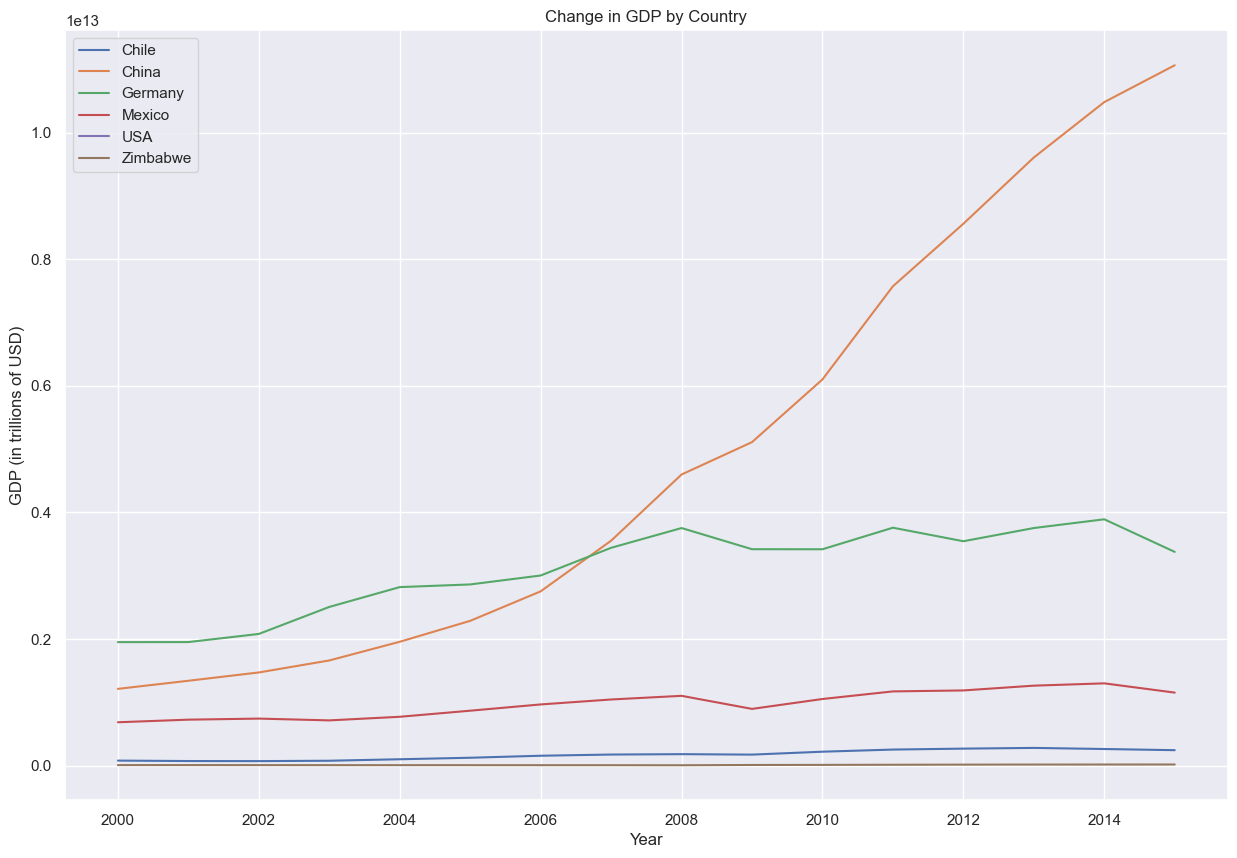

In [61]:
# Group the data by country and year, and calculate the mean GDP for each group
grouped_df = df.groupby(['Country', 'Year']).mean().reset_index()

# Create a list of the six countries we want to plot
countries = ['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']

# Plot the data for each country
for country in countries:
    data = grouped_df[grouped_df['Country'] == country]
    plt.plot(data['Year'], data['GDP'], label=country)

# Add labels and legend
plt.title('Change in GDP by Country')
plt.xlabel('Year')
plt.ylabel('GDP (in trillions of USD)')
plt.legend()

# Show the plot
plt.show()

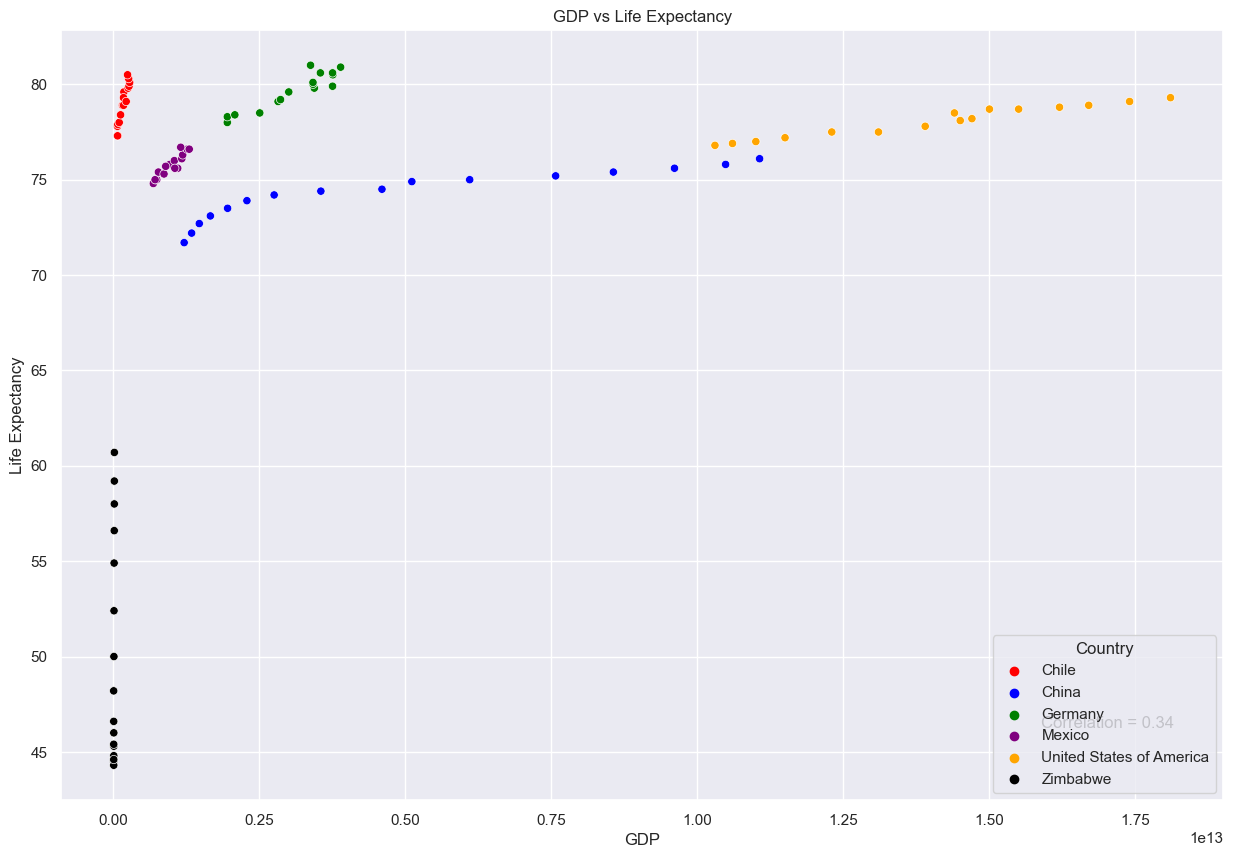

In [65]:
# Define a color palette for the six countries
color_palette = {'Chile': 'red', 'China': 'blue', 'Germany': 'green', 'Mexico': 'purple', 'United States of America': 'orange', 'Zimbabwe': 'black'}

# Create a scatter plot of GDP vs life expectancy with different color for each country
sns.scatterplot(data=df, x='GDP', y='Life expectancy at birth (years)', hue='Country', palette=color_palette)

# Calculate the correlation between GDP and life expectancy columns
corr = df['GDP'].corr(df['Life expectancy at birth (years)'])

plt.title('GDP vs Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.text(0.9, 0.1, f'Correlation = {corr:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
plt.show()